In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
model = models.Sequential()

In [ ]:
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test), batch_size=64)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 79ms/step - accuracy: 0.3286 - loss: 1.8087 - val_accuracy: 0.5381 - val_loss: 1.2967
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 79ms/step - accuracy: 0.5624 - loss: 1.2361 - val_accuracy: 0.5843 - val_loss: 1.1439
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 78ms/step - accuracy: 0.6173 - loss: 1.0863 - val_accuracy: 0.6233 - val_loss: 1.0825
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 82ms/step - accuracy: 0.6567 - loss: 0.9734 - val_accuracy: 0.6449 - val_loss: 1.0121
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 78ms/step - accuracy: 0.6934 - loss: 0.8801 - val_accuracy: 0.6869 - val_loss: 0.8974
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 79ms/step - accuracy: 0.7079 - loss: 0.8288 - val_accuracy: 0.6844 - val_loss: 0.9121
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 81ms/step - accuracy: 0.7287 - loss: 0.7682 - val_accuracy: 0.6836 - val_loss: 0.9281
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 80ms/step - accuracy: 0.7450 - loss: 0.7237 - 

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc*100:.2f}%")

313/313 - 4s - 14ms/step - accuracy: 0.7071 - loss: 0.8543
Test Accuracy: 70.71%


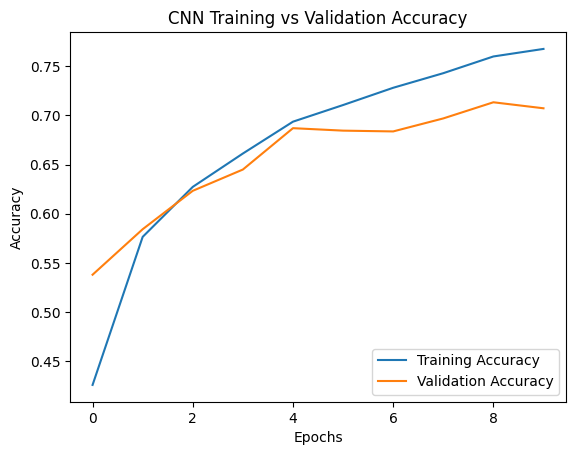

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("CNN Training vs Validation Accuracy")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
sample_index = 5
img = x_test[sample_index]

In [ ]:
img_array = np.expand_dims(img, axis=0)

In [ ]:
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


Predicted: frog
Actual: frog


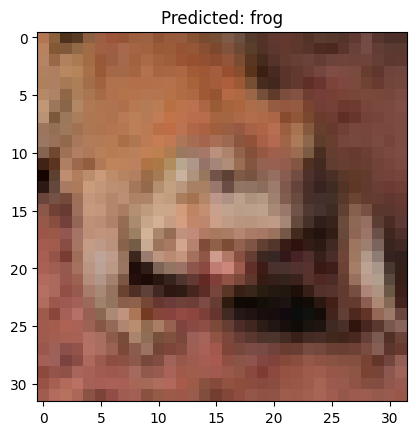

In [ ]:
print(f"Predicted: {class_names[predicted_class]}")
print(f"Actual: {class_names[np.argmax(y_test[sample_index])]}")
plt.imshow(img)
plt.title(f"Predicted: {class_names[predicted_class]}")
plt.show()